In [122]:
import numpy as np

In [123]:
c=np.array([1,7,3,4,5])
print(c+5)

[ 6 12  8  9 10]


In [4]:
set([i for sublist in a for i in sublist])

TypeError: 'int' object is not iterable

In [17]:
import collections


def flatten(x):
    if isinstance(x, collections.Iterable):
        return [a for i in x for a in flatten(i)]
    else:
        return [x]


a = [1, 2, 3, [1, [2, 4]]]
out = set(flatten(a))
out

{1, 2, 3, 4}

In [16]:
def flatten(S):
    if S == []:
        return S
    if isinstance(S[0], list):
        return flatten(S[0]) + flatten(S[1:])
    return S[:1] + flatten(S[1:])

a = [1, 2, 3, [1, [2, 4]]]
out = set(flatten(a))
out

{1, 2, 3, 4}

In [30]:
f = lambda x: [i for i in x]
g = lambda x: f(x) if isinstance(x, list) else x

In [31]:
g(a)

[1, 2, 3, [1, [2, 4]]]

In [18]:
set([num for item in a for num in (item if isinstance(item, list) else (item,))])

TypeError: unhashable type: 'list'

In [34]:
from functools import reduce

In [36]:
newlist = reduce(lambda x,y: x+y, a)

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [44]:
a

[1, 2, 3, [1, [2, 4]]]

In [ ]:
lambda *n: (e for a in n for e in (flatten(*a) if isinstance(a, (tuple, list)) else (a,)))

In [56]:
f = lambda *n: (e for a in n for e in (f(*a) if isinstance(a, (tuple, list)) else (a,)))

set(f(a))

In [98]:
n = [4, [3,4]]

In [101]:
f = lambda *n: [i for a in n for i in (f(*a) if isinstance(a, (tuple, list)) else (a,))]

In [102]:
f(n)

[4, 3, 4]

In [114]:
a = [5,[3,7]]

In [115]:
(a if isinstance(a, (tuple, list)) else (a,))

[5, [3, 7]]

In [119]:
a = 5

In [120]:
(a if isinstance(a,list) else (a,))

(5,)

In [124]:
import torch
a=torch.randn(3,100)
b=torch.randn(3,100)
row_num = a.size()[0] # 3

# Given two matrix with shape (n1,n2)
# I want to have the row-wise `matmul` results which will result in a tensor with size (n1, ) 

scores = []
for i in range(row_num):
    score_i = a[i,:].matmul(b[i,:])
    scores.append(score_i)
expected_result = torch.tensor(scores)

In [125]:
expected_result

tensor([ 4.8495,  3.3092, -2.7939])

In [130]:
torch.einsum('ij,ij->i',a,b)

tensor([ 4.8495,  3.3092, -2.7939])

In [167]:
torch.diagonal(torch.tensordot(a,b,dims=([1],[1])))

tensor([ 4.8495,  3.3092, -2.7939])

In [168]:
torch.dot(a, b.T)

RuntimeError: 1D tensors expected, but got 2D and 2D tensors

In [171]:
np.diagonal(torch.matmul(a, b.T))

array([ 4.8495054,  3.309207 , -2.7938733], dtype=float32)

In [174]:
np.diagonal(a @ b.T)

array([ 4.8495054,  3.309207 , -2.7938733], dtype=float32)

In [151]:
a.shape

torch.Size([3, 100])

In [152]:
b.shape

torch.Size([3, 100])

tensor([[  4.8495, -13.4082,  -7.3157],
        [ -8.7273,   3.3092,   0.8553],
        [ -6.9103,  14.5447,  -2.7939]])

In [177]:
import pandas as pd

In [182]:
df = pd.read_clipboard()

In [183]:
df

,inventory_partner,inventory_partner2,calc
0,A1,aa,1
1,A2,bb,2
2,A3,cc,5
3,A4,dd,4
4,A5,ee,5
5,A6,ff,3


In [184]:
df.groupby('inventory_partner')

In [53]:
import pandas as pd

bbgDf = pd.DataFrame({'BBG': ['700', 'UNI', 'CSL', 'CSL', 'UNI'],
                        'ID': ['AA','BB','CC','DD','EE'],
                     'TICKER': ['1.hk','2.hk','3.hk','4.hk','5.hk'],
                     'AMOUNT': [100.01,200.45,300.12,400.98,500.45]})

f = lambda x : x.sum() if x.dtype=='float' else ', '.join(x)
g = {'ID':f,'TICKER':f,'AMOUNT':f}

bbgDf = bbgDf.groupby('BBG').agg(g).reset_index()
print(bbgDf)

   BBG      ID      TICKER  AMOUNT
0  700      AA        1.hk  100.01
1  CSL  CC, DD  3.hk, 4.hk  701.10
2  UNI  BB, EE  2.hk, 5.hk  700.90


In [60]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

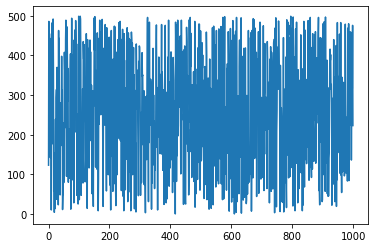

In [63]:
plt.plot(np.random.randint(0,500, (1000,)))

In [ ]:
   ID   A   B   C   Values
0   1   0.0 0   10  10
1   1   2.0 0   0   2
2   1   0.0 0   3   3
3   2   4.0 0   0   4
4   3   0.0 9   0   9
5   3   0.0 3   0   3
6   4   4.0 0   0   4
7   5   0.0 0   0   5
8   6   NaN 0   2   2
9   7   0.0 0   3   3

In [103]:
import pandas as pd
df = pd.DataFrame({'ID': [1,1,1,2,3,3,4,5,6,7], 
                   'A': [0,1,0,1,0,0,1,0,np.nan,0],
                   'B': [0,0,0,0,1,1,0,0,0,0],
                   'C': [1,0,1,0,0,0,0,0,1,1],
                   'Values': [10, 2, 3,4,9,3,4,5,2,3]})

array([[False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [False, False, False],
       [False, False,  True],
       [False, False,  True]])

In [78]:
df['A'] = df['A']*df['Values']
df['B'] = df['B']*df['Values']
df['C'] = df['C']*df['Values']

print(df)

   ID    A  B   C  Values
0   1  0.0  0  10      10
1   1  2.0  0   0       2
2   1  0.0  0   3       3
3   2  4.0  0   0       4
4   3  0.0  9   0       9
5   3  0.0  3   0       3
6   4  4.0  0   0       4
7   5  0.0  0   0       5
8   6  NaN  0   2       2
9   7  0.0  0   3       3


In [88]:
df['Values']df['A'].eq(1)

0    False
1     True
2    False
3     True
4    False
5    False
6     True
7    False
8    False
9    False
Name: A, dtype: bool

In [135]:
ind=[[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]]
col=['Example', 'Example', 'Example', 'Example']
pd.DataFrame(np.zeros((6,4)), columns = col, index=pd.MultiIndex.from_tuples(ind))

Example  Example  Example  Example
1 2 3 4      0.0      0.0      0.0      0.0
      4      0.0      0.0      0.0      0.0
      4      0.0      0.0      0.0      0.0
      4      0.0      0.0      0.0      0.0
      4      0.0      0.0      0.0      0.0
      4      0.0      0.0      0.0      0.0

In [133]:
pd.MultiIndex.from_tuples(ind)

MultiIndex([(1, 2, 3, 4),
            (1, 2, 3, 4),
            (1, 2, 3, 4),
            (1, 2, 3, 4),
            (1, 2, 3, 4),
            (1, 2, 3, 4)],
           )

In [154]:
get_percent = lambda x,y: (0.2)*x

200.0

0.25

In [152]:


0.4*1000/2

200.0

In [161]:
from sklearn.model_selection import train_test_split

X, y = np.random.random((1000,10)), np.random.random((1000,))

p = 0.2
new_p = (p*y.shape[0])/((1-p)*y.shape[0])

X, X_val, y, y_val = train_test_split(X, y, test_size=p)
X_train, X_test, y, y_test = train_test_split(X, y, test_size=new_p)

print([i.shape for i in [X_train, X_test, X_val]])

[(600, 10), (200, 10), (200, 10)]


In [163]:
df = pd.read_clipboard(sep='\s*\|\s*').iloc[1:,1:-1]
df

,ID,details
1,1,"list('name' = 'Something', 'description' = 'Wh..."
2,2,"list('name' = 'Something Else', 'description' ..."


In [181]:
df = pd.DataFrame({'ID':[1,2],
                  'details':[{'name' : 'Something', 'description' : 'What something is'},
                             {'name' : 'Something Else', 'description' : 'Another description'}]})

type(df.details.iloc[0])
## dict

df[['details_name','details_description']] = df.details.apply(pd.Series)

print(df.drop('details', axis=1))

   ID    details_name  details_description
0   1       Something    What something is
1   2  Something Else  Another description


,name,description
0,Something,What something is
1,Something Else,Another description


In [184]:
import os
import sys
import numpy as np
import re

lines = ['>=2 1 2 3', '>=3 1 2 3', '>=2 1 2 3']

p=1
#sys.stdout = open("results.txt", "w")
for i in list(lines):
    if i[0] != '<' and i[0] != '>' and i[0] != '=':# change txt file for np.array
        p = str(' '.join(i.split())) 
        print(p)
        
    else:
        w = i[3:]
        frst=i[2]
        w = ', '.join(w.split())
        y = i[2]
        y=int(y)+1
        #INSERT input to array
        c=np.array([w])
        c1 = [int(i) for i in c[0].replace(" ", "").split(",")]

        frst=str(frst).replace("[",'')
        frst=str(frst).replace("]",'')
        frst=int(frst)
        c1=np.array(c1)        

        sest2=c1
        c1=np.array([c1]*frst) #frst is the first value by which the matrix is multiplied
        c1=np.transpose(c1)#transpose
        

        #change value every iteration
        c1=c1 + 10 * (np.arange(c1.shape[1]) + 1)*p
        left=c1*-1
        sedem=np.transpose(left)*-1 #transpose matrix
        p +=1
       
        #editing outputs
        sedem=str(sedem).replace("[",'')
        sedem=str(sedem).replace("]",' 0')
        sedem=str(sedem).replace(".",'')
        sedem = sedem[:-1]
        sedem=str(sedem).replace("\n ",'\n')
        sedem=str(sedem).replace("  ",' ')
        sedem=str(sedem).replace("\n ",'\n')
        sedem=str(sedem).lstrip()       
        print(sedem,'\n')

11 12 13 0
21 22 23 0  

21 22 23 0
41 42 43 0
61 62 63 0  

31 32 33 0
61 62 63 0  



In [186]:
arr = np.array([[2,1,2,3],[3,1,2,3],[2,1,2,3]])

In [190]:
arr[:,0]

array([2, 3, 2])

In [194]:
arr[:,0]*arr[:,1:]

array([[2, 6, 6],
       [2, 6, 6],
       [2, 6, 6]])

In [199]:
arr[:,0]*10

array([20, 30, 20])

In [270]:
#Setup each row in text file as a row in a np matrix

arr = np.array([[2,1,2,3],
                [3,1,2,3],
                [2,1,2,3]])

print('INPUT:')
print(arr)
print('')

ones = np.repeat(arr[:,1:], arr[:,0], axis=0)
tens = (np.arange(1,arr[:,0].sum()+1)*10)
nums = ones+tens[:, None]

print('nums:')
print(nums)
print('')

#Splitting nums for each input
l = np.cumsum([0]+list(arr[:,0]))
chunks = [nums[i:j,:] for i,j in zip(l,l[1:])]

print('OUTPUT:')
for i,chunk in enumerate(chunks):
    print('chunk number',i,':')
    print(chunk)
    print('')
    
INPUT:
[[2 1 2 3]
 [3 1 2 3]
 [2 1 2 3]]

nums:
[[11 12 13]
 [21 22 23]
 [31 32 33]
 [41 42 43]
 [51 52 53]
 [61 62 63]
 [71 72 73]]

OUTPUT:
chunk number 0 :
[[11 12 13]
 [21 22 23]]

chunk number 1 :
[[31 32 33]
 [41 42 43]
 [51 52 53]]

chunk number 2 :
[[61 62 63]
 [71 72 73]]

INPUT:
[[2 1 2 3]
 [3 1 2 3]
 [2 1 2 3]]

nums:
[[11 12 13]
 [21 22 23]
 [31 32 33]
 [41 42 43]
 [51 52 53]
 [61 62 63]
 [71 72 73]]

OUTPUT:
chunk number 0 :
[[11 12 13]
 [21 22 23]]

chunk number 1 :
[[31 32 33]
 [41 42 43]
 [51 52 53]]

chunk number 2 :
[[61 62 63]
 [71 72 73]]



In [254]:
[i for i in ]

SyntaxError: invalid syntax (<ipython-input-254-2b2b023bcd64>, line 1)

In [272]:
import tensorflow as tf

In [309]:
x

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[7, 2, 3],
       [5, 0, 1],
       [7, 8, 2]], dtype=int32)>

In [310]:
tf.argmax(x, axis=1)

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([0, 0, 1])>

In [311]:
tf.sparse.mask(x, tf.argmax(x, axis=1))

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'indices'

In [321]:
x = tf.constant([[7, 2, 3], 
                 [5, 0, 5], 
                 [7, 8, 7]])

tf.where(x==tf.reduce_max(x, axis=1, keepdims=True), 1,0)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 0, 0],
       [1, 0, 1],
       [0, 1, 0]], dtype=int32)>

In [340]:
tf.maximum(x, axis=1, keepdims=1) == x

TypeError: maximum() got an unexpected keyword argument 'axis'

In [341]:
tf.math.maximum()

TypeError: maximum() got an unexpected keyword argument 'axis'

In [375]:
tf.cast(tf.equal(tf.argsort(tf.argsort(x, 1,), 1), x.shape[0]-1), tf.int64)

<tf.Tensor: shape=(3, 3), dtype=int64, numpy=
array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])>

In [398]:
L=[16, 5, 14, 7, 21, 9, 14, 19, 27, 1, 18, 5,27, 15, 14, 5, 27, 20, 15, 27, 15, 14, 5]

L2 = L+[27]*(3-len(L)%3) #Append list
n = int(len(L2)/3)       #Get number of cols
L3 = [L2[i:i+n] for i in range(0,len(L2),n)] #chunk list
L3

[[16, 5, 14, 7, 21, 9, 14, 19],
 [27, 1, 18, 5, 27, 15, 14, 5],
 [27, 20, 15, 27, 15, 14, 5, 27]]

In [3]:
d = {1: [3, 2, 3, 2],
2: [1, 2, 3, 4], 
3: [3, 4, 2, 1]}

In [7]:
[k for k,v in d.items() if v[0]==1]

[2]

In [8]:
[k for k in d if d[k][0] == 1]

[2]

In [ ]:
          X    Z  participantNum  obsScenario  startPos  targetPos
16000 -16.0 -5.0         6950203            2         2          3
16001 -16.0 -5.0         6950203            2         2          3
16002 -16.0 -5.0         6950203            2         2          3
16003 -16.0 -5.0         6950203            2         2          3
16004 -16.0 -5.0         6950203            2         2          3
16005 -16.0 -5.0         6950203            2         2          3
16006 -16.0 -5.0         6950203            2         2          3
16007 -16.0 -5.0         6950203            2         2          3
16008 -16.0 -5.0         6950203            2         2          3
16009 -16.0 -5.0         6950203            2         2          3

In [9]:
import pandas as pd

In [11]:
df = pd.read_clipboard()

In [13]:
df

,X,Z,participantNum,obsScenario,startPos,targetPos
16000,-16.0,-5.0,6950203,2,2,3
16001,-16.0,-5.0,6950203,2,2,3
16002,-16.0,-5.0,6950203,2,2,3
16003,-16.0,-5.0,6950203,2,2,3
16004,-16.0,-5.0,6950203,2,2,3
16005,-16.0,-5.0,6950203,2,2,3
16006,-16.0,-5.0,6950203,2,2,3
16007,-16.0,-5.0,6950203,2,2,3
16008,-16.0,-5.0,6950203,2,2,3
16009,-16.0,-5.0,6950203,2,2,3


In [21]:
import numpy as np
from scipy import stats

In [24]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t._ppf((1+confidence)/2., n-1)
    return m, m+h, m-h

In [25]:
df.groupby(['obsScenario','startPos','targetPos'])['X'].apply(mean_confidence_interval)

obsScenario  startPos  targetPos
2            2         3            (-16.0, -16.0, -16.0)
Name: X, dtype: object

In [48]:
def f_test_df(n_rows, n_cols):
    df1 = pd.DataFrame(np.random.rand(n_rows, n_cols))
    df = df1.applymap(lambda x: round(x*10))
    return df 

np.random.seed(seed=1)
df1 = f_test_df(7, 7)

In [41]:
df1

,0,1,2,3,4,5,6
0,4,7,0,3,1,1,2
1,3,4,5,4,7,2,9
2,0,7,4,6,1,2,8
3,10,3,7,9,9,1,0
4,2,9,1,4,10,5,7
5,3,7,8,0,8,10,7
6,3,8,1,4,9,3,3


In [42]:
def f_bounds(x, lower, upper):
    if x < lower:
        return 'lower'
    elif x > upper:
        return 'upper'
    else:
        return x

In [70]:
df1.loc[2:5, 2:5]<lower

,2,3,4,5
2,False,False,True,False
3,False,False,False,True
4,True,False,False,False
5,False,True,False,False


In [47]:
df1

,0,1,2,3,4,5,6
0,4,7,0,3,1,1,2
1,3,4,5,4,7,2,9
2,0,7,4,upper,lower,2,8
3,10,3,upper,upper,upper,lower,0
4,2,9,lower,4,upper,5,7
5,3,7,upper,lower,upper,upper,7
6,3,8,1,4,9,3,3


,0,1,2,3,4,5,6
0,4,7,0,3,1,1,2
1,3,4,5,4,7,2,9
2,0,7,4,upper,lower,2,8
3,10,3,upper,upper,upper,lower,0
4,2,9,lower,4,upper,5,7
5,3,7,upper,lower,upper,upper,7
6,3,8,1,4,9,3,3


In [81]:
cond1 = df1[(df1.loc[2:5, 2:5]<lower)].notna()
cond2 = df1[(df1.loc[2:5, 2:5]>upper)].notna() 
df1_new = df1.where(~cond1, 'lower').where(~cond2, 'upper')
print(df1_new)

    0  1      2      3      4      5  6
0   4  7      0      3      1      1  2
1   3  4      5      4      7      2  9
2   0  7      4  upper  lower      2  8
3  10  3  upper  upper  upper  lower  0
4   2  9  lower      4  upper      5  7
5   3  7  upper  lower  upper  upper  7
6   3  8      1      4      9      3  3

    0  1      2      3      4      5  6
0   4  7      0      3      1      1  2
1   3  4      5      4      7      2  9
2   0  7      4  upper  lower      2  8
3  10  3  upper  upper  upper  lower  0
4   2  9  lower      4  upper      5  7
5   3  7  upper  lower  upper  upper  7
6   3  8      1      4      9      3  3


[(1, 4, 4), (3, 6, 2), (4, 8, 4)]

In [99]:
arr = [[1, 0, 3, 4],
       [0, 0, 0, 0],
       [4, 0, 6, 8],
       [4, 0, 2, 4]]

rows = [i for i in arr if set(i)!={0}]
cols = [i for i in zip(*rows) if set(i)!={0}]
arr_new = [list(i) for i in zip(*cols)]
print(arr_new)

[[1, 3, 4], [4, 6, 8], [4, 2, 4]]


array([[1, 3, 4],
       [4, 6, 8],
       [4, 2, 4]])

In [125]:
import numpy as np

arr = np.array(arr)
cond = (arr==0)
cond_rows = np.all(cond, axis=1)
cond_cols = np.all(cond, axis=0)

arr[~cond_cols, :][:,~cond_rows]

array([[1, 3, 4],
       [4, 6, 8],
       [4, 2, 4]])

array([[1, 3, 4],
       [4, 6, 8],
       [4, 2, 4]])

In [151]:
arr[~(arr==0).all(0)][:,~(arr==0).all(1)]

array([[1, 3, 4],
       [4, 6, 8],
       [4, 2, 4]])

In [141]:
arr[np.where(~(arr==0).all(0))]

array([[1, 0, 3, 4],
       [4, 0, 6, 8],
       [4, 0, 2, 4]])

In [144]:
arr[[0,2,3]]

array([[1, 0, 3, 4],
       [4, 0, 6, 8],
       [4, 0, 2, 4]])

In [44]:
df1.loc[2:5, 2:5] = df1.loc[2:5, 2:5].applymap(lambda x: f_bounds(x, lower, upper))
print(df1)


    0  1      2      3      4      5  6
0   4  7      0      3      1      1  2
1   3  4      5      4      7      2  9
2   0  7      4  upper  lower      2  8
3  10  3  upper  upper  upper  lower  0
4   2  9  lower      4  upper      5  7
5   3  7  upper  lower  upper  upper  7
6   3  8      1      4      9      3  3

    0  1      2      3      4      5  6
0   4  7      0      3      1      1  2
1   3  4      5      4      7      2  9
2   0  7      4  upper  lower      2  8
3  10  3  upper  upper  upper  lower  0
4   2  9  lower      4  upper      5  7
5   3  7  upper  lower  upper  upper  7
6   3  8      1      4      9      3  3


In [154]:
d = {'x':3, 'y':2, 'z':5, 'p': 4, 'q':7, 't' :6}

In [ ]:
col1    col2
 A     [x,y]
 B     [z]
 C     [p,q,x,y]
 D     [q,z,t]

In [188]:
df.col2 = [[j for j in list(i) if j not in ['[',']','',',']] for i in df.col2]

In [189]:
df

,col1,col2
0,A,"[x, y]"
1,B,[z]
2,C,"[p, q, x, y]"
3,D,"[q, z, t]"


In [159]:
df = pd.read_clipboard()

In [195]:
df

,col1,col2
0,A,"[x, y]"
1,B,[z]
2,C,"[p, q, x, y]"
3,D,"[q, z, t]"


In [216]:
d_inv = {v:k for k,v in d.items()}

df.explode('col2')\
  .replace(d)\
  .groupby('col1')['col2']\
  .nlargest(2)\
  .replace(d_inv)\
  .groupby(level=0)\
  .apply(list)

col1
A    [x, y]
B       [z]
C    [q, p]
D    [q, t]
Name: col2, dtype: object

col1
A    [x, y]
B       [z]
C    [q, p]
D    [q, t]
Name: col2, dtype: object

{'x': 3, 'y': 2, 'z': 5, 'p': 4, 'q': 7, 't': 6}

In [172]:
df.col2.apply(lambda x: [d.get(i) for i in x])

0          [3, 2]
1             [5]
2    [4, 7, 3, 2]
3       [7, 5, 6]
Name: col2, dtype: object

In [217]:
from collections import defaultdict

In [218]:
d = defaultdict(dict)

In [257]:
data1 = {'Height': {'Ajay': 145.830651784016,
  'Bist': 145.91779226416696,
  'Kay': 146.16402145150246}
}
 
data2 = {'Height': {'Kim': 155.830651784016,
  'DDD': 155.91779226416696,
  'Arambh': 156.16402145150246}
}

data3 = {'Height': {'Dong': 165.830651784016,
  'Ding': 165.91779226416696,
  'Dumba': 166.16402145150246}
}

In [243]:
[i.values() for i in L]

[dict_values([{'Ajay': 145.830651784016, 'Bist': 145.91779226416696, 'Kay': 146.16402145150246}]),
 dict_values([{'Kim': 155.830651784016, 'DDD': 155.91779226416696, 'Arambh': 156.16402145150246}]),
 dict_values([{'Dong': 165.830651784016, 'Ding': 165.91779226416696, 'Dumba': 166.16402145150246}])]

In [251]:
dict(ChainMap(*L)).keys()

dict_keys(['Height'])

In [254]:
from collections import ChainMap, defaultdict

d = defaultdict(ChainMap)

for key in dict(ChainMap(*L)).keys():
    d[key] = dict(ChainMap(*[list(i.values())[0] for i in L]))
    d = dict(d)
    
print(d)

{'Height': {'Dong': 165.830651784016,
  'Ding': 165.91779226416696,
  'Dumba': 166.16402145150246,
  'Kim': 155.830651784016,
  'DDD': 155.91779226416696,
  'Arambh': 156.16402145150246,
  'Ajay': 145.830651784016,
  'Bist': 145.91779226416696,
  'Kay': 146.16402145150246}}

In [272]:
from collections import ChainMap, defaultdict

d = defaultdict(dict)

for key in dict(ChainMap(*L)).keys():
    for i in L:
        d[key].update(i.get(key))
        d = dict(d)

d

{'Height': {'Ajay': 145.830651784016,
  'Bist': 145.91779226416696,
  'Kay': 146.16402145150246,
  'Kim': 155.830651784016,
  'DDD': 155.91779226416696,
  'Arambh': 156.16402145150246,
  'Dong': 165.830651784016,
  'Ding': 165.91779226416696,
  'Dumba': 166.16402145150246}}

{'Dong': 165.830651784016,
 'Ding': 165.91779226416696,
 'Dumba': 166.16402145150246,
 'Kim': 155.830651784016,
 'DDD': 155.91779226416696,
 'Arambh': 156.16402145150246,
 'Ajay': 145.830651784016,
 'Bist': 145.91779226416696,
 'Kay': 146.16402145150246}

In [321]:
{k:dict(ChainMap(*[i.get(k) for i in L])) for k in dict(ChainMap(*L)).keys()}

{'Height': {'Dong': 165.830651784016,
  'Ding': 165.91779226416696,
  'Dumba': 166.16402145150246,
  'Kim': 155.830651784016,
  'DDD': 155.91779226416696,
  'Arambh': 156.16402145150246,
  'Ajay': 145.830651784016,
  'Bist': 145.91779226416696,
  'Kay': 146.16402145150246}}

In [324]:
d1 = {'a':{'x':1, 'y':2}, 'b':{'l':1, 'm':2}}
d2 = {'a':{'i':1, 'j':2}, 'b':{'w':1, 'z':2}}

L = [d1, d2]

{k:dict(ChainMap(*[i.get(k) for i in L])) for k in dict(ChainMap(*L)).keys()}

{'a': {'i': 1, 'j': 2, 'x': 1, 'y': 2}, 'b': {'w': 1, 'z': 2, 'l': 1, 'm': 2}}

{'a': {'i': 1, 'j': 2, 'x': 1, 'y': 2}, 'b': {'w': 1, 'z': 2, 'l': 1, 'm': 2}}


In [ ]:
        CITIES
0       ['A','B']
1       ['A','B','C','D']
2       ['A','B','C']
4       ['X']
5       ['X','Y','Z']

In [345]:
df = pd.read_clipboard()

In [348]:
df.CITIES = [eval(i) for i in df.CITIES]
df

,CITIES
0,"[A, B]"
1,"[A, B, C, D]"
2,"[A, B, C]"
4,[X]
5,"[X, Y, Z]"


In [359]:
d = pd.get_dummies(df.CITIES.apply(pd.Series))
d

,0_A,0_X,1_B,1_Y,2_C,2_Z,3_D
0,1,0,1,0,0,0,0
1,1,0,1,0,1,0,1
2,1,0,1,0,1,0,0
4,0,1,0,0,0,0,0
5,0,1,0,1,0,1,0


In [370]:
df.explode('CITIES').reset_index().assign(n=1).groupby(['index','CITIES'])['n'].sum()

index  CITIES
0      A         1
       B         1
1      A         1
       B         1
       C         1
       D         1
2      A         1
       B         1
       C         1
4      X         1
5      X         1
       Y         1
       Z         1
Name: n, dtype: int64

In [427]:
df=pd.DataFrame({'ID':['A','B','C'],'Name':[['A','B','C'],['C','D'],['A']]})
print(df.explode('Name'))

  ID Name
0  A    A
0  A    B
0  A    C
1  B    C
1  B    D
2  C    A


In [539]:
a = np.arange(0,2*3*3).reshape(2,3,3)

# array([[[ 0,  1,  2],
#         [ 3,  4,  5],
#         [ 6,  7,  8]],

#        [[ 9, 10, 11],
#         [12, 13, 14],
#         [15, 16, 17]]])

a.diagonal(axis1=1, axis2=2)

# array([[ 0,  4,  8],
#        [ 9, 13, 17]])

array([[ 0,  4,  8],
       [ 9, 13, 17]])

In [531]:
a = np.zeros((3,3,3))
i,j = np.diag_indices(3)
a[:,i,j] = dv[:,None]
a

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]])

In [817]:
m1=np.array([[0.1 , 0.12, 0.32],
       [0.22, 0.15, 0.16],
       [0.42, 0.52, 0.62],
       [0.44, 0.35, 0.36]])

m2=np.array([[0.12 , 0.144, 0.384],
       [0.264, 0.18 , 0.192],
       [0.504, 0.624, 0.744],
       [0.528, 0.42 , 0.432]])

m3=np.array([[0.106 , 0.1272, 0.3392],
       [0.2332, 0.159 , 0.1696],
       [0.4452, 0.5512, 0.6572],
       [0.4664, 0.371 , 0.3816]])

delta_m1  = 2
delta_m2 = 5
delta_m3 = 10

In [818]:
#Stack all the matrices (because similar shape)
M = np.stack([m1, m2, m3])                   #(3, 4, 3)
D = np.stack([delta_m1, delta_m2, delta_m3]) #(3,)

##################### FUNCTION ######################
k=20

def local_regression(x0, X, Y, k):
    # add bias term
    x0 = np.r_[1, x0]
    X = np.c_[np.ones(len(X)), X]
    
    # fit model: normal equations with kernel
    xw = X.T * radial_kernel(x0, X, k)
    beta = np.linalg.pinv(xw @ X) @ xw @ Y
    
    # predict value
    return x0 @ beta

def radial_kernel(x0, X, k):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * k * k))

def smooth(x,y):
    return np.array([local_regression(x[p],x,y,k) for p in range(len(x))])

smooth_v = np.vectorize(smooth, signature='(i),(i)->(i)')
##################################################

#smooth(D,M[:,0,0])
smooth_v(D[None, None,:], M.transpose(2,1,0)).transpose(2,1,0)  #(3,4,3)

array([[[0.10713757, 0.12856508, 0.34284022],
        [0.23570265, 0.16070635, 0.17142011],
        [0.44997779, 0.55711536, 0.66425293],
        [0.4714053 , 0.37498149, 0.38569525]],

       [[0.10847502, 0.13017003, 0.34712007],
        [0.23864505, 0.16271253, 0.17356004],
        [0.4555951 , 0.56407012, 0.67254514],
        [0.4772901 , 0.37966258, 0.39051008]],

       [[0.11017182, 0.13220618, 0.35254982],
        [0.242378  , 0.16525773, 0.17627491],
        [0.46272164, 0.57289345, 0.68306527],
        [0.484756  , 0.38560136, 0.39661854]]])

In [820]:
M

array([[[0.1   , 0.12  , 0.32  ],
        [0.22  , 0.15  , 0.16  ],
        [0.42  , 0.52  , 0.62  ],
        [0.44  , 0.35  , 0.36  ]],

       [[0.12  , 0.144 , 0.384 ],
        [0.264 , 0.18  , 0.192 ],
        [0.504 , 0.624 , 0.744 ],
        [0.528 , 0.42  , 0.432 ]],

       [[0.106 , 0.1272, 0.3392],
        [0.2332, 0.159 , 0.1696],
        [0.4452, 0.5512, 0.6572],
        [0.4664, 0.371 , 0.3816]]])

In [819]:
y = np.array([2,5,10])
x = np.array([0.1,0.12,0.106])
smooth(x,y)

array([5.14556944, 6.34810085, 5.50632924])

In [762]:
M[:,0,0]

array([0.1  , 0.12 , 0.106])

In [761]:
M[:,0,0].shape

(3,)

In [763]:
M

array([[[0.1   , 0.12  , 0.32  ],
        [0.22  , 0.15  , 0.16  ],
        [0.42  , 0.52  , 0.62  ],
        [0.44  , 0.35  , 0.36  ]],

       [[0.12  , 0.144 , 0.384 ],
        [0.264 , 0.18  , 0.192 ],
        [0.504 , 0.624 , 0.744 ],
        [0.528 , 0.42  , 0.432 ]],

       [[0.106 , 0.1272, 0.3392],
        [0.2332, 0.159 , 0.1696],
        [0.4452, 0.5512, 0.6572],
        [0.4664, 0.371 , 0.3816]]])

In [764]:
M.shape

(3, 4, 3)

In [749]:
smooth_v

In [732]:
D[:,None, None].shape

(3, 1, 1)

In [719]:
M[:,0,0]

array([0.1  , 0.12 , 0.106])

array([[[0.1   , 0.12  , 0.106 ],
        [0.22  , 0.264 , 0.2332],
        [0.42  , 0.504 , 0.4452],
        [0.44  , 0.528 , 0.4664]],

       [[0.12  , 0.144 , 0.1272],
        [0.15  , 0.18  , 0.159 ],
        [0.52  , 0.624 , 0.5512],
        [0.35  , 0.42  , 0.371 ]],

       [[0.32  , 0.384 , 0.3392],
        [0.16  , 0.192 , 0.1696],
        [0.62  , 0.744 , 0.6572],
        [0.36  , 0.432 , 0.3816]]])

In [705]:


def local_regression(x0, X, Y, k):
    # add bias term
    x0 = np.r_[1, x0]
    X = np.c_[np.ones(len(X)), X]
    
    # fit model: normal equations with kernel
    xw = X.T * radial_kernel(x0, X, k)
    beta = np.linalg.pinv(xw @ X) @ xw @ Y
    
    # predict value
    return x0 @ beta

def radial_kernel(x0, X, k):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * k * k))

def smooth(x,y):
    x = np.array(x)
    y = np.array(y)
    return [local_regression(x[p],x,y,k) for p in ]

y = np.array([2,5,10])
x = np.array([0.1,0.12,0.106])
smooth(x,y)

[5.145568903540788, 6.3480995934956015, 5.506329615622455]

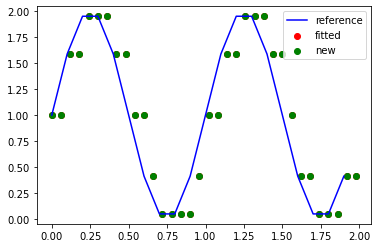

In [579]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# generate the dots that we want to lookup
# this is just a sin wave for this example
# my real data doesn't match a nice arithmatic curve
x1 = np.arange(0.0, 2.0, 0.1)

f = lambda x: 1 + np.sin(2 * np.pi * x)
y1 = f(x1)
df1 = pd.DataFrame({'x': x1, 'y': y1})

plt.plot(df1['x'], df1['y'], label='reference', c='blue')

df2 = pd.DataFrame({'x': np.arange(0.0, 2.0, 0.06)})

# Now apply df1 as a function
# df2['y'] = f(df2['x'])
# This is the bit I don't know how to do
# this code is close, but not good enough
# and also not flexible enough since it assumes df1['x'] is evenly spaced
df2['y'] = (df2['x'] - (df2['x'] % 0.1)).map(df1.set_index('x')['y'])
df2['y2'] = (df2['x'] - (df2['x'] % 0.1)).map(f)

plt.scatter(df2['x'], df2['y'], label='fitted', c='red')
plt.scatter(df2['x'], df2['y2'], label='new', c='green')

plt.legend()
plt.show()

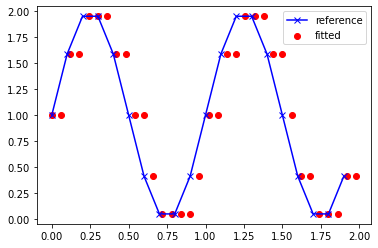

In [674]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# generate the dots that we want to lookup
# this is just a sin wave for this example
# my real data doesn't match a nice arithmatic curve
x1 = np.arange(0.0, 2.0, 0.1)
f = lambda x: 1 + np.sin(2 * np.pi * x)
y1 = f(x1)

df1 = pd.DataFrame({'x': x1, 'y': y1})

plt.plot(df1['x'], df1['y'], 'x-', label='reference', c='blue')

df2 = pd.DataFrame({'x': np.arange(0.0, 2.0, 0.06)})

# Now apply df1 as a function
# df2['y'] = f(df2['x'])
# This is the bit I don't know how to do
# this code is close, but not good enough
# and also not flexible enough since it assumes df1['x'] is evenly spaced
df2['y'] = (df2['x'] - (df2['x'] % 0.1)).map(f)

plt.scatter(df2['x'], df2['y'], label='fitted', c='red')

plt.legend()

In [675]:
df2 = pd.merge_asof(df1, df2, on='x', direction='nearest')
print(df2)

      x       y_x       y_y
0   0.0  1.000000  1.000000
1   0.1  1.587785  1.587785
2   0.2  1.951057  1.587785
3   0.3  1.951057  1.951057
4   0.4  1.587785  1.587785
5   0.5  1.000000  1.587785
6   0.6  0.412215  1.000000
7   0.7  0.048943  0.048943
8   0.8  0.048943  0.048943
9   0.9  0.412215  0.048943
10  1.0  1.000000  1.000000
11  1.1  1.587785  1.000000
12  1.2  1.951057  1.587785
13  1.3  1.951057  1.951057
14  1.4  1.587785  1.951057
15  1.5  1.000000  1.587785
16  1.6  0.412215  0.412215
17  1.7  0.048943  0.412215
18  1.8  0.048943  0.048943
19  1.9  0.412215  0.412215


In [607]:
print('Arange:')
print(list(np.arange(0.0, 2.0, 0.1)))
print('Linspace:')
print(list(np.linspace(0, 2, 20)))

Arange:
[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4000000000000001, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9000000000000001]
Linspace:
[0.0, 0.10526315789473684, 0.21052631578947367, 0.3157894736842105, 0.42105263157894735, 0.5263157894736842, 0.631578947368421, 0.7368421052631579, 0.8421052631578947, 0.9473684210526315, 1.0526315789473684, 1.1578947368421053, 1.263157894736842, 1.3684210526315788, 1.4736842105263157, 1.5789473684210527, 1.6842105263157894, 1.789473684210526, 1.894736842105263, 2.0]


array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

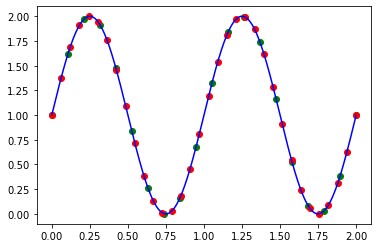

In [601]:
#Original curve
x = np.linspace(0,2,1000)
y = f(x)

plt.plot(x, y, label='reference', c='blue')


#Old Fitted
shp = np.arange(0.0, 2.0, 0.1).shape[0] #Using linspace to avoid rounding errors
x1 = np.linspace(0.0, 2.0, shp)
y1 = f(x1)

plt.scatter(x1, y1, label='fitted', c='green')


#New fitted
shp = np.arange(0.0, 2.0, 0.06).shape[0] #Using linspace to avoid rounding errors
x2 = np.linspace(0.0, 2.0, shp)
y2 = f(x2)

plt.scatter(x2, y2, label='fitted', c='red')

In [600]:
np.arange(0.0, 2.0, 0.06).shape

(34,)

In [591]:
np.linspace(0.0, 2.0, 34)

array([0.        , 0.06060606, 0.12121212, 0.18181818, 0.24242424,
       0.3030303 , 0.36363636, 0.42424242, 0.48484848, 0.54545455,
       0.60606061, 0.66666667, 0.72727273, 0.78787879, 0.84848485,
       0.90909091, 0.96969697, 1.03030303, 1.09090909, 1.15151515,
       1.21212121, 1.27272727, 1.33333333, 1.39393939, 1.45454545,
       1.51515152, 1.57575758, 1.63636364, 1.6969697 , 1.75757576,
       1.81818182, 1.87878788, 1.93939394, 2.        ])

In [583]:
df1

,x,y
0,0.0,1.000000
1,0.1,1.587785
2,0.2,1.951057
3,0.3,1.951057
4,0.4,1.587785
5,0.5,1.000000
6,0.6,0.412215
7,0.7,0.048943
8,0.8,0.048943
9,0.9,0.412215


In [625]:
f = lambda x: 1 + np.sin(2 * np.pi * x)
x1 = np.linspace(0.0, 2.0, 20)
y1 = f(x1)

In [626]:
estimates = np.polyfit(x1,y1,2)
f_estimates = lambda x, p: p[2]*x**2 + p[1]*x + p[0]

In [627]:
y1_interp = f_estimates(y1, estimates)

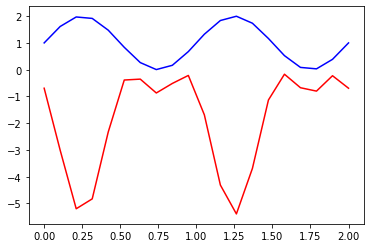

In [628]:
plt.plot(x1, y1, label='reference', c='blue')
plt.plot(x1, y1_interp, label='reference', c='red')

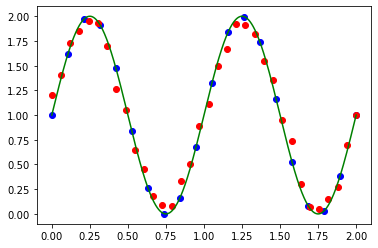

In [673]:
x1 = np.linspace(0, 2, 20) #points at 0.1 distance
x2 = np.linspace(0, 2, 34) #points at 0.06 distance

df1 = pd.DataFrame({'A':'x1', 'x':x1, 'y':f(x1)})  #dataframe with filled values
df2 = pd.DataFrame({'A':'x2', 'x':x2, 'y':np.nan}) #dataframe with nans

df3 = pd.concat([df1, df2]).sort_values('x')  #Vertically combine and sort values
df3['y_new'] = df3['y'].interpolate()         #Fill the nans by interpolation
df4 = df3[df3['A']=='x2']                     #Split the 0.06, interpolated values to another dataframe

#Plot all 3
plt.plot(x, y, label='reference', c='green')  #original function
plt.scatter(df1['x'], df1['y'], label='fitted', c='blue')  # points at 0.1
plt.scatter(df4['x'], df4['y_new'], label='fitted', c='red') #interpolated points at 0.06

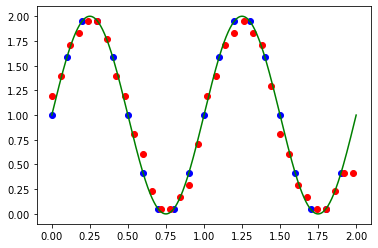

In [821]:
import numpy as np
import pandas as pd
import scipy.sparse as sparse

#download data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(url, names=column_names,
          na_values='?', comment='\t',
          sep=' ', skipinitialspace=True)

lenOfDF = (len(df))
#add numpy array
arr = sparse.coo_matrix(([1,1,1], ([0,1,2], [1,2,0])), shape=(lenOfDF,lenOfDF))
df['NumpyColumn'] = arr.toarray().tolist()

In [827]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,NumpyColumn
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [876]:
g_input = layers.Input(shape=(9,))
x = layers.Dense(512, activation='relu')(g_input)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
g_V = layers.Dense(1, activation='sigmoid')(x)

generator = Model(g_input,g_V)
generator.compile(loss='binary_crossentropy', optimizer='adam')
generator.summary()

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_51 (InputLayer)        [(None, 9)]               0         
_________________________________________________________________
dense_134 (Dense)            (None, 512)               5120      
_________________________________________________________________
dense_135 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_136 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_137 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_138 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_139 (Dense)            (None, 1)                 33 

Model: "model_27"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_57 (InputLayer)           [(None, 8)]          0                                            
__________________________________________________________________________________________________
input_58 (InputLayer)           [(None, 398)]        0                                            
__________________________________________________________________________________________________
concatenate_23 (Concatenate)    (None, 406)          0           input_57[0][0]                   
                                                                 input_58[0][0]                   
__________________________________________________________________________________________________
dense_164 (Dense)               (None, 512)          208384      concatenate_23[0][0]      

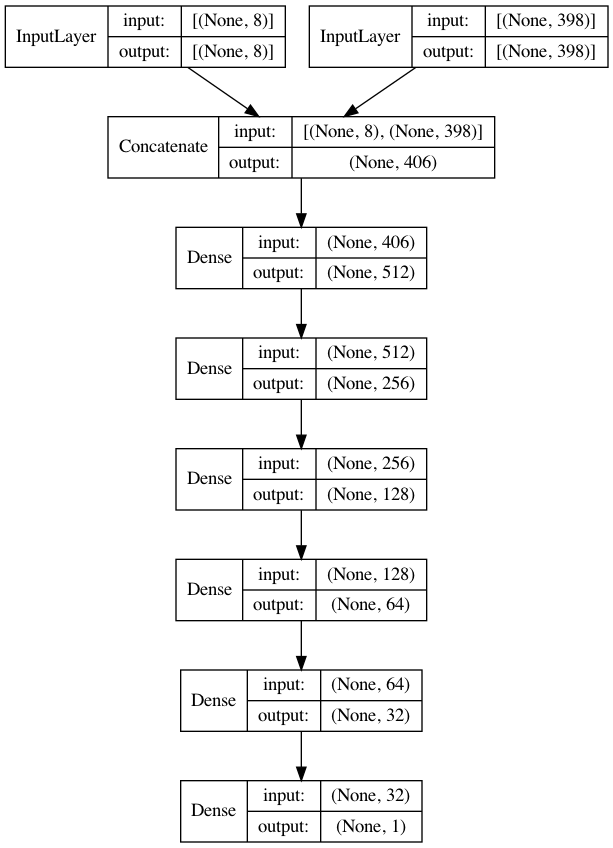

In [914]:
import tensorflow as tf
from tensorflow.keras import layers, Model, utils, activations

g_input = layers.Input(shape=(8,))       #<--------
np_input = layers.Input(shape=(398,))    #<--------
x = layers.concatenate([g_input, np_input])
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
g_V = layers.Dense(1, activation='sigmoid')(x)

generator = Model([g_input,np_input],g_V)
generator.compile(loss='binary_crossentropy', optimizer='adam')
generator.summary()

print('')
print('RESHAPING DATA TO - (398,8) and (398,398)')
generator.predict([df.drop('NumpyColumn',1).to_numpy(), 
                   np.array(df['NumpyColumn'].tolist())]).shape



In [912]:
import tensorflow as tf
from tensorflow.keras import layers, Model, utils, activations

g_input = layers.Input(shape=(406,))
x = layers.Dense(512, activation='relu')(g_input)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
g_V = layers.Dense(1, activation='sigmoid')(x)

generator = Model(g_input,g_V)
generator.compile(loss='binary_crossentropy', optimizer='adam')

print('')
print('RESHAPING DATA TO - (398, 406)')
ddf = pd.concat([df.iloc[:,:-1], df.NumpyColumn.apply(pd.Series)], axis=1)
generator.predict(tf.convert_to_tensor(ddf)).shape

Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_56 (InputLayer)        [(None, 406)]             0         
_________________________________________________________________
dense_158 (Dense)            (None, 512)               208384    
_________________________________________________________________
dense_159 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_160 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_161 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_162 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_163 (Dense)            (None, 1)                 33 

(398, 1)

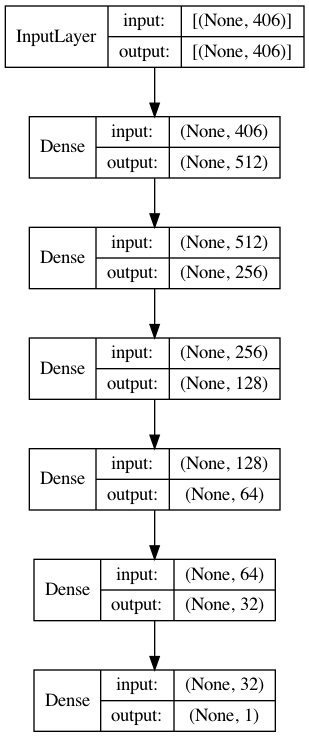

<tf.Tensor: shape=(398, 406), dtype=float64, numpy=
array([[ 18.,   8., 307., ...,   0.,   0.,   0.],
       [ 15.,   8., 350., ...,   0.,   0.,   0.],
       [ 18.,   8., 318., ...,   0.,   0.,   0.],
       ...,
       [ 32.,   4., 135., ...,   0.,   0.,   0.],
       [ 28.,   4., 120., ...,   0.,   0.,   0.],
       [ 31.,   4., 119., ...,   0.,   0.,   0.]])>

In [948]:
from scipy.ndimage import zoom
from skimage.transform import pyramid_gaussian
from skimage.transform import pyramid_expand, pyramid_reduce

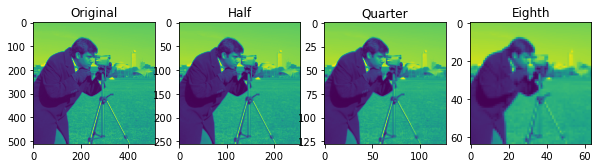

In [974]:
from skimage.data import camera
from skimage.transform import pyramid_reduce

def plotit(img, h, q, e):
    fig, axes = plt.subplots(1,4, figsize=(10,15))
    axes[0].imshow(img)
    axes[1].imshow(h)
    axes[2].imshow(q)
    axes[3].imshow(e)
    axes[0].title.set_text('Original')
    axes[1].title.set_text('Half')
    axes[2].title.set_text('Quarter')
    axes[3].title.set_text('Eighth')

img = camera() #(512,512)
h = pyramid_reduce(img, 2)
q = pyramid_reduce(img, 4)
e = pyramid_reduce(img, 8)

plotit(img, h, q, e)

In [968]:
from skimage.transform import pyramid_reduce

images = np.random.random((50, 192, 256, 3))

images_half = np.stack([pyramid_reduce(i, 2, multichannel=True) for i in images])
images_quater = np.stack([pyramid_reduce(i, 4, multichannel=True) for i in images])
images_eighth = np.stack([pyramid_reduce(i, 8, multichannel=True) for i in images])

print('Shape of original',images.shape)
print('Shape of half scaled',images_half.shape)
print('Shape of quater scaled',images_quater.shape)
print('Shape of eighth scaled',images_eighth.shape)

Shape of original (50, 192, 256, 3)
Shape of half scaled (50, 96, 128, 3)
Shape of quater scaled (50, 48, 64, 3)
Shape of eighth scaled (50, 24, 32, 3)

Shape of original (50, 192, 256, 3)
Shape of half scaled (50, 96, 128, 3)
Shape of quater scaled (50, 48, 64, 3)
Shape of eighth scaled (50, 24, 32, 3)


In [ ]:
{'A&A': [list of flows that start with A&A], 
 'AFM': [list of flows that start with AFM]', 
 'OMSS': [list of flows that start with OMSS]} 

In [978]:
list_4 = ['A&A OMSS 10.1.2.0/24 10.1.1.0/24 Authorisation_Response', 'A&A OMSS 10.1.2.0/24 10.1.1.0/24 Authentication_Response', 'OMSS A&A 10.1.1.0/24 10.1.2.0/24 Authorsiation_Request', 'OMSS A&A 10.1.1.0/24 10.1.2.0/24 Authentication_Request', 'A&A AFM 10.1.2.0/24 10.1.3.0/24 Authorisation_Response', 'AFM A&A 10.1.3.0/24 10.1.2.0/24 Priviliged_Authentication_Request', 'A&A AFM 10.1.2.0/24 10.1.3.0/24 Privilged_Authentication_Response', 'AFM A&A 10.1.3.0/24 10.1.2.0/24 Priviliged_Authorisation_Request', 'A&A AFM 10.1.2.0/24 10.1.3.0/24 Authorisation_Response']
dict_1 = {'OMSS': '10.1.1.0/24', 'A&A': '10.1.2.0/24', 'AFM': '10.1.3.0/24', 'ATM': '10.1.4.0/24'}

In [977]:
list_4

['A&A OMSS 10.1.2.0/24 10.1.1.0/24 Authorisation_Response',
 'A&A OMSS 10.1.2.0/24 10.1.1.0/24 Authentication_Response',
 'OMSS A&A 10.1.1.0/24 10.1.2.0/24 Authorsiation_Request',
 'OMSS A&A 10.1.1.0/24 10.1.2.0/24 Authentication_Request',
 'A&A AFM 10.1.2.0/24 10.1.3.0/24 Authorisation_Response',
 'AFM A&A 10.1.3.0/24 10.1.2.0/24 Priviliged_Authentication_Request',
 'A&A AFM 10.1.2.0/24 10.1.3.0/24 Privilged_Authentication_Response',
 'AFM A&A 10.1.3.0/24 10.1.2.0/24 Priviliged_Authorisation_Request',
 'A&A AFM 10.1.2.0/24 10.1.3.0/24 Authorisation_Response']

In [979]:
dict_1

{'OMSS': '10.1.1.0/24',
 'A&A': '10.1.2.0/24',
 'AFM': '10.1.3.0/24',
 'ATM': '10.1.4.0/24'}

In [986]:
from collections import defaultdict
dict_2 = defaultdict(list)

for key, value in dict_1.items():
    for i in list_4:
        src_sys, dst_sys, src, dst, fun = i.split()
        if src_sys.strip() == key.strip():
            dict_2[key].append(src+" "+dst+" "+fun)
            
dict_2 = dict(dict_2)

In [ ]:
src_sys, dst_sys, src, dst, fun

In [987]:
dict_2

{'OMSS': ['10.1.1.0/24 10.1.2.0/24 Authorsiation_Request',
  '10.1.1.0/24 10.1.2.0/24 Authentication_Request'],
 'A&A': ['10.1.2.0/24 10.1.1.0/24 Authorisation_Response',
  '10.1.2.0/24 10.1.1.0/24 Authentication_Response',
  '10.1.2.0/24 10.1.3.0/24 Authorisation_Response',
  '10.1.2.0/24 10.1.3.0/24 Privilged_Authentication_Response',
  '10.1.2.0/24 10.1.3.0/24 Authorisation_Response'],
 'AFM': ['10.1.3.0/24 10.1.2.0/24 Priviliged_Authentication_Request',
  '10.1.3.0/24 10.1.2.0/24 Priviliged_Authorisation_Request']}

In [ ]:
{'OMSS': ['10.1.1.0/24 10.1.2.0/24 Authorsiation_Request',
          '10.1.1.0/24 10.1.2.0/24 Authentication_Request'],
 'A&A': ['10.1.2.0/24 10.1.1.0/24 Authorisation_Response',
         '10.1.2.0/24 10.1.1.0/24 Authentication_Response',
         '10.1.2.0/24 10.1.3.0/24 Authorisation_Response',
         '10.1.2.0/24 10.1.3.0/24 Privilged_Authentication_Response',
         '10.1.2.0/24 10.1.3.0/24 Authorisation_Response'],
 'AFM': ['10.1.3.0/24 10.1.2.0/24 Priviliged_Authentication_Request',
         '10.1.3.0/24 10.1.2.0/24 Priviliged_Authorisation_Request']}

In [993]:
list_4

['A&A OMSS 10.1.2.0/24 10.1.1.0/24 Authorisation_Response',
 'A&A OMSS 10.1.2.0/24 10.1.1.0/24 Authentication_Response',
 'OMSS A&A 10.1.1.0/24 10.1.2.0/24 Authorsiation_Request',
 'OMSS A&A 10.1.1.0/24 10.1.2.0/24 Authentication_Request',
 'A&A AFM 10.1.2.0/24 10.1.3.0/24 Authorisation_Response',
 'AFM A&A 10.1.3.0/24 10.1.2.0/24 Priviliged_Authentication_Request',
 'A&A AFM 10.1.2.0/24 10.1.3.0/24 Privilged_Authentication_Response',
 'AFM A&A 10.1.3.0/24 10.1.2.0/24 Priviliged_Authorisation_Request',
 'A&A AFM 10.1.2.0/24 10.1.3.0/24 Authorisation_Response']

In [1007]:
[i for i in list_4 if i.split()[0].strip() in dict_1.keys()]

['A&A OMSS 10.1.2.0/24 10.1.1.0/24 Authorisation_Response',
 'A&A OMSS 10.1.2.0/24 10.1.1.0/24 Authentication_Response',
 'OMSS A&A 10.1.1.0/24 10.1.2.0/24 Authorsiation_Request',
 'OMSS A&A 10.1.1.0/24 10.1.2.0/24 Authentication_Request',
 'A&A AFM 10.1.2.0/24 10.1.3.0/24 Authorisation_Response',
 'AFM A&A 10.1.3.0/24 10.1.2.0/24 Priviliged_Authentication_Request',
 'A&A AFM 10.1.2.0/24 10.1.3.0/24 Privilged_Authentication_Response',
 'AFM A&A 10.1.3.0/24 10.1.2.0/24 Priviliged_Authorisation_Request',
 'A&A AFM 10.1.2.0/24 10.1.3.0/24 Authorisation_Response']

In [1012]:
[i.split() for i in list_4]

[['A&A', 'OMSS', '10.1.2.0/24', '10.1.1.0/24', 'Authorisation_Response'],
 ['A&A', 'OMSS', '10.1.2.0/24', '10.1.1.0/24', 'Authentication_Response'],
 ['OMSS', 'A&A', '10.1.1.0/24', '10.1.2.0/24', 'Authorsiation_Request'],
 ['OMSS', 'A&A', '10.1.1.0/24', '10.1.2.0/24', 'Authentication_Request'],
 ['A&A', 'AFM', '10.1.2.0/24', '10.1.3.0/24', 'Authorisation_Response'],
 ['AFM',
  'A&A',
  '10.1.3.0/24',
  '10.1.2.0/24',
  'Priviliged_Authentication_Request'],
 ['A&A',
  'AFM',
  '10.1.2.0/24',
  '10.1.3.0/24',
  'Privilged_Authentication_Response'],
 ['AFM',
  'A&A',
  '10.1.3.0/24',
  '10.1.2.0/24',
  'Priviliged_Authorisation_Request'],
 ['A&A', 'AFM', '10.1.2.0/24', '10.1.3.0/24', 'Authorisation_Response']]

In [1017]:
tf.Tensor([1,2,3],dtype=tf.float32)

TypeError: __init__() missing 1 required positional argument: 'value_index'

In [1026]:
print(tf.convert_to_tensor([1,2,3]).numpy()) #get numpy
print(tf.convert_to_tensor([1,2,3])[1:].numpy()) #get numpy after indexing
print(tf.convert_to_tensor([1,2,3]).numpy()[1:]) #index after getting numpy

[1 2 3]
[2 3]
[2 3]

[1 2 3]
[2 3]
[2 3]


In [1032]:
arr

array([[0.0317142 , 0.00936959, 0.22271378, ..., 0.60409357, 0.266611  ,
        0.62073231],
       [0.47745517, 0.67285916, 0.60504961, ..., 0.57280932, 0.43490179,
        0.28293585],
       [0.98699826, 0.91261339, 0.90342584, ..., 0.34286132, 0.43729231,
        0.76138768],
       ...,
       [0.36178209, 0.14208384, 0.33048756, ..., 0.49803161, 0.50143777,
        0.87210884],
       [0.43838879, 0.96325436, 0.22535289, ..., 0.80806222, 0.10212784,
        0.50857046],
       [0.86253794, 0.4446784 , 0.92486241, ..., 0.00635952, 0.53186922,
        0.56207554]])

In [1087]:
arr = np.random.randint(1,3,(5,5)).astype(float)
arr[(2,3),:] = np.nan
#np.where(arr==np.nan)
arr

array([[ 2.,  2.,  1.,  1.,  2.],
       [ 1.,  2.,  1.,  1.,  2.],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [ 1.,  2.,  2.,  1.,  1.]])

In [1088]:
means = np.nanmean(arr, axis=0)
arr_full = np.where(np.isnan(arr), means, arr)
arr_full

array([[2.        , 2.        , 1.        , 1.        , 2.        ],
       [1.        , 2.        , 1.        , 1.        , 2.        ],
       [1.33333333, 2.        , 1.33333333, 1.        , 1.66666667],
       [1.33333333, 2.        , 1.33333333, 1.        , 1.66666667],
       [1.        , 2.        , 2.        , 1.        , 1.        ]])

In [1099]:
arr = np.tril(np.random.randint(1,5,(5,5)).astype(float))
arr[(2),:] = np.nan
arr1 = arr+arr.T
arr1

array([[ 4.,  2., nan,  3.,  2.],
       [ 2.,  4., nan,  1.,  1.],
       [nan, nan, nan, nan, nan],
       [ 3.,  1., nan,  2.,  1.],
       [ 2.,  1., nan,  1.,  8.]])

In [1102]:
means = np.nanmean(arr1, axis=0)
arr2 = np.where(np.isnan(arr1), means, arr1) #replace with colwise means
arr3 = np.where(np.isnan(arr2), arr2.T, arr2) #replicate to rows
arr4 = np.where(np.isnan(arr3),np.nanmean(np.diagonal(arr3)),arr3) #replace diagonal nan by mean of diagonal

<ipython-input-1102-3e2a4972b57a>:1: RuntimeWarning: Mean of empty slice
  means = np.nanmean(arr1, axis=0)


array([[4.  , 2.  , 2.75, 3.  , 2.  ],
       [2.  , 4.  , 2.  , 1.  , 1.  ],
       [2.75, 2.  ,  nan, 1.75, 3.  ],
       [3.  , 1.  , 1.75, 2.  , 1.  ],
       [2.  , 1.  , 3.  , 1.  , 8.  ]])

array([[4.  , 2.  , 2.75, 3.  , 2.  ],
       [2.  , 4.  , 2.  , 1.  , 1.  ],
       [2.75, 2.  , 4.5 , 1.75, 3.  ],
       [3.  , 1.  , 1.75, 2.  , 1.  ],
       [2.  , 1.  , 3.  , 1.  , 8.  ]])

In [1109]:
TT_INT = 'INT'
TT_FLOAT = 'FLOAT'
TT_PLUS = 'PLUS'
TT_MINUS = 'MINUS'
TT_MUL = 'MUL'
TT_DIV = 'DIV'
TT_LPAREN = 'LPAREN'
TT_RPAREN = 'RPAREN'

####################################
# TOKEN
####################################

class Token:
    def __init__(self, type_, value=None):
        self.type = type_
        self.value = value

    def __repr__(self):
        if self.value: return f'{self.type}:{self.value}'
        return f'{self.type}'

In [1114]:
a = Token(TT_DIV)
b = Token(TT_FLOAT)

print(a.__dict__, b.__dict__)

{'type': 'DIV', 'value': None} {'type': 'FLOAT', 'value': None}


In [1121]:
df = pd.read_clipboard()
df

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5
3,0.0,3.0,0.0,4


In [1144]:
df['max'] = (df*[5,10,7,3]).max(1)
print(df)

     A    B    C  D   max
0  0.0  2.0  0.0  0  20.0
1  3.0  4.0  0.0  1  40.0
2  0.0  0.0  0.0  5  15.0
3  0.0  3.0  0.0  4  30.0


In [1134]:
df

,A,B,C,D,max
0,0.0,2.0,0.0,0,20.0
1,3.0,4.0,0.0,1,40.0
2,0.0,0.0,0.0,5,15.0
3,0.0,3.0,0.0,4,30.0


In [ ]:
    A   B   C   D
0   0.0 2.0 0.0 0
1   3.0 4.0 0.0 1
2   0.0 0.0 0.0 5
3   0.0 3.0 0.0 4

In [1135]:
df = pd.read_clipboard()

In [1141]:
f = lambda x: (x*[5,10,7,3]).max()
df['max'] = df.apply(f, axis=1)

In [1143]:
def Nuevo(x):
    return (x*[5,10,7,3]).max()

df.apply(Nuevo, axis=1)

0    20.0
1    40.0
2    15.0
3    30.0
dtype: float64

In [ ]:
RowNo.    Subject    
1      Apple
2      Banana
3      Orange
4      Lemon
5      Strawberry

In [1147]:
df1 = pd.read_clipboard()
df1

,RowNo.,Subject
0,1,Apple
1,2,Banana
2,3,Orange
3,4,Lemon
4,5,Strawberry


In [ ]:
row_number Subjects Special?
1    Banana      Yes
2    Lemon       No
3    Apple       No
4    Orange      No
5    Strawberry  Yes
6    Cranberry   Yes
7    Watermelon  No

In [1148]:
df2 = pd.read_clipboard()
df2

,row_number,Subjects,Special?
0,1,Banana,Yes
1,2,Lemon,No
2,3,Apple,No
3,4,Orange,No
4,5,Strawberry,Yes
5,6,Cranberry,Yes
6,7,Watermelon,No


In [1164]:
ddf = pd.merge(df1['Subject'], 
               df2[['row_number','Subjects']], 
               left_on='Subject', 
               right_on='Subjects', 
               how='left').drop('Subjects',1)

ddf.columns = df1.columns[::-1]
print(ddf)

      Subject  RowNo.
0       Apple       3
1      Banana       1
2      Orange       4
3       Lemon       2
4  Strawberry       5


In [1185]:
d = dict(zip(df2['Subjects'], df2['row_number']))

# {'Banana': 1,
#  'Lemon': 2,
#  'Apple': 3,
#  'Orange': 4,
#  'Strawberry': 5,
#  'Cranberry': 6,
#  'Watermelon': 7}

df1['Row No.'] = df1.Subject.replace(d)
print(df1.drop('RowNo.',1))

      Subject  Row No.
0       Apple        3
1      Banana        1
2      Orange        4
3       Lemon        2
4  Strawberry        5

      Subject  Row No.
0       Apple        3
1      Banana        1
2      Orange        4
3       Lemon        2
4  Strawberry        5


In [1190]:
a = ['61','62','63','64','65','66','67']
val=0
b = ['64','65','66','67']
c = ['0','1','2','3']

a = list(map(int, a))
b = list(map(int, b))
c = list(map(int, c))

for d,e in zip(b,c) :
    if a - 1 <= d <= a and a is not None:
        val += d*e
        if val > 0:
            print("1")
        else:
            print("2")

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [1222]:
import pandas as pd

def myfcn(row, data, val):
    z1 = row['y'] + val
    z2 = row['x']*row['y']
    return pd.Series(
        {
         'fancy_column_name1': z1, 
         'fancy_column_name2': z2/val},
        name=row.name
    )
    

col1 = [1, 1.5, 3.1, 3.4, 2, -1]
col2 = [1, -3, 2, 8, 2.5, -1.3]
df = pd.DataFrame(list(zip(col1, col2)), columns=['x', 'y'])

df_subset = df.iloc[[0,2,3]]
#display(df_subset)
out = df_subset.apply(myfcn, axis=1, args=(df_subset, 100))
df = pd.concat([df, out], axis=1)

df_subset2 = df.iloc[[5]]
out = df_subset2.apply(myfcn, axis=1, args=(df_subset2, 250))

out.insert(0, 'x', 0)
out.insert(1, 'y', 0)
df = df.combine_first(out)
df

,x,y,fancy_column_name1,fancy_column_name2
0,1.0,1.0,101.0,0.0100
1,1.5,-3.0,NaN,NaN
2,3.1,2.0,102.0,0.0620
3,3.4,8.0,108.0,0.2720
4,2.0,2.5,NaN,NaN
5,-1.0,-1.3,248.7,0.0052


In [1214]:
out

,x,y,fancy_column_name1,fancy_column_name2
5,NaN,NaN,"y 248.7 y NaN Name: 5, dtype: float64","x NaN x NaN y NaN y NaN Name: 5, dtype..."


,fancy_column_name1,fancy_column_name2
5,248.7,0.0052


In [1225]:
df = pd.DataFrame({'A': ['x1','x2','x3', 'x4'], 'B':[['v1','v2'],['v3','v4'],['v5','v6'],['v7','v8']], 'C':[['c1','c2'],['c3','c4'],['c5','c6'],['c7','c8']]})

In [1226]:
df

,A,B,C
0,x1,"[v1, v2]","[c1, c2]"
1,x2,"[v3, v4]","[c3, c4]"
2,x3,"[v5, v6]","[c5, c6]"
3,x4,"[v7, v8]","[c7, c8]"


In [ ]:
df.set_index('A')

In [1251]:
import numpy as np

A = np.random.randn(1000, 2000)
mask = np.where((A >=0.1) & (A <= 0.5))

idx_flat = np.ravel_multi_index(mask, (1000,2000))
idx_2d = np.unravel_index(idx_flat, (1000,2000))

print(np.allclose(A.ravel()[idx_flat],A[mask]))
print(np.allclose(idx_2d,mask))

In [1263]:
def fortran_function(x):
    return x

output = fortran_function(A.ravel()[idx_flat]) #Flat values go into fortran function

A[idx_2d] = output #Update the 2D indexes of A with the flat output

array([0.14130098, 0.33887869, 0.10851242, ..., 0.45141419, 0.36102473,
       0.11280649])

In [1262]:
A = np.random.randn(5, 5)
mask = np.where((A >=0.1) & (A <= 0.5))

True
True


In [1271]:
import numpy as np


my_list = [['Hamburg', 'Hanover', 'Leipzig'], ['Leipzig', 'Nuremberg']]
Correct_result = []
for sub_list in my_list:
    Correct_result.append(np.array(sub_list, dtype=object))
Correct_result = np.array(Correct_result, dtype=object)

In [1272]:
Correct_result

array([array(['Hamburg', 'Hanover', 'Leipzig'], dtype=object),
       array(['Leipzig', 'Nuremberg'], dtype=object)], dtype=object)

In [1275]:
keys = ["a", "b", "c", "d"]
d = {key: None for key in keys}
d

{'a': None, 'b': None, 'c': None, 'd': None}

In [1276]:
df2 = pd.DataFrame(np.random.randint(0,2,(5,10)))
df2

,0,1,2,3,4,5,6,7,8,9
0,0,1,1,1,1,0,1,1,1,1
1,0,1,1,0,0,0,0,0,0,0
2,0,1,0,1,1,0,1,1,1,0
3,0,1,0,0,1,1,1,0,1,1
4,0,0,1,0,0,1,0,0,1,0


In [1284]:
(df2==1).values.sum()
(df2==1).to_numpy().sum()

25

In [1289]:
k=0
for i in range(df2.shape[0]):
    for j in range(df2.shape[1]):
        if df2.iloc[i,j]==1:
            k+=1
print(k)

25


In [1290]:
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras import Sequential

In [ ]:
X_train = np.random.random(((800,2)))
y_train = np.random.random(())

vocab = 1000

In [1295]:
model = Sequential()
model.add(Embedding(vocab, 64, input_length=length)
model.add(Bidirectional(LSTM(20, return_sequences = True)))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epoch=2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 16, 64)            64000     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 16, 40)            13600     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 40)                9760      
_________________________________________________________________
dense_172 (Dense)            (None, 1)                 41        
Total params: 87,401
Trainable params: 87,401
Non-trainable params: 0
_________________________________________________________________


In [1375]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'Name':['Pa','Co','Pa'],'Number B2B':[1,2,1], 'Number B2C':[0,1,1]})

#Set 'Name' as index
df = df.set_index('Name')

#kernel to shift values to diagonals
k = [[1,0], 
     [0,1]]

#if all values in row are non zero, multiply with k else return x values with added axis
f = lambda row: row.values*k if (row!=0).all() else row.values[None,:]

#apply on 3 rows and explode to get 5 rows instead of 3
out = df.apply(f, axis=1).explode()

#convert to dataframe with separate columns, col names and index values
out2 = pd.DataFrame(out.to_list(), columns=df.columns, index=out.index).reset_index()
print(out2)

  Name  Number B2B  Number B2C
0   Pa           1           0
1   Co           2           0
2   Co           0           1
3   Pa           1           0
4   Pa           0           1


In [1391]:
out = df.apply(lambda row: row.values*k, axis=1).explode()
out = pd.DataFrame(out.to_list(), columns=df.columns, index=out.index)
out = out[~(out==0).all(1)].reset_index()
print(out)

  Name  Number B2B  Number B2C
0   Pa           1           0
1   Co           2           0
2   Co           0           1
3   Pa           1           0
4   Pa           0           1
